# Session 1: Introduction

## Demonstration of automatic differentiation

First we do the work manually and afterwards compare it to pytorchs result.

Consider the derivative of
$$f(x) = 3x^2 -3x + 2$$
at the position $x=1$.

Calculate the derivative:
$$f'(x) = 2*3x - 3+ 0$$

Evaluate the derivative at positione $x=1$:
$$f'(1) = 2*3*1 -3*1 + 0= 3$$

Now let pytorch do the work for us

In [3]:
import torch

x = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)
y = 3*x**2 - 3*x + 2

y.backward()
x.grad

tensor([3.])

# Demonstrate numerical optimization

Let's calculate the minimum of $f$ analytically. That means calculate:
$$\arg\min_{x} f(x) = \arg\min_{x} 3x^2 -3x + 2$$

We set the derivative to zero and solve for $x$:
$$\begin{aligned}
f'(x) &= 0\\
2*3x - 3+ 0 &= 0\\
6x&=3\\
x&=0.5
\end{aligned}$$

The minimum value of $f$ is therefore $f(0.5)= 1.25$

Now let's do the same with pytorch. We will use a pytroch variable for and an optimizer to find the value for $x$ that minimizes $f$. We iterate and call the optimizer in each iteration to update the variable $x$ to approach the minimum value.

Important:
- we start with a randomly initialized value for the parameters $x$
- the optimization speed and success depends heavily on how we setup the optimizer
- the programmer has to decide when to stop the iteration

In [105]:
import torch

x = torch.autograd.Variable(torch.Tensor([1.]), requires_grad=True)

n_iterations = 100
learning_rate = 0.01
optimizer = torch.optim.Adam(params=[x], lr=learning_rate)

def f(x):
    return 3*x**2 - 3*x + 2

f_x_vals = []
x_vals = []
for interation_number in range(n_iterations):
    optimizer.zero_grad()
    cost = f(x)
    cost.backward()
    optimizer.step()
    f_x_vals.append(cost.detach().numpy()[0])
    x_vals.append(x.detach().numpy()[0])
print(f'last x: {x_vals[-1]}, last f(x): {f_x_vals[-1]}')

last x: 0.4960996210575104, last f(x): 1.2500439882278442


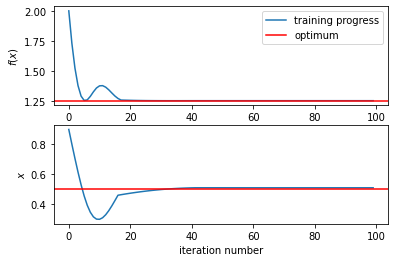

In [118]:
import matplotlib.pyplot as plt
figure, axs = plt.subplots(2)
axs[0].plot(f_x_vals, label='training progress')
axs[0].axhline(1.25, color='red', label='optimum')
axs[0].set_ylabel('$f(x)$')
axs[0].legend()
axs[1].plot(x_vals)
axs[1].axhline(0.5, color='red')
axs[1].set_ylabel('$x$')
axs[1].set_xlabel('iteration number')
plt.show()

## Using different learning rates

In [108]:
import torch

x = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)

n_iterations = 100
learning_rate = .1
optimizer = torch.optim.Adam(params=[x], lr=learning_rate)

def f(x):
    return 3*x**2 - 3*x + 2

f_x_vals = []
x_vals = []
for interation_number in range(n_iterations):
    optimizer.zero_grad()
    cost = f(x)
    cost.backward()
    optimizer.step()
    f_x_vals.append(cost.detach().numpy()[0])
    x_vals.append(x.detach().numpy()[0])
print(f'last x: {x_vals[-1]}, last f(x): {f_x_vals[-1]}')

last x: 0.4977536201477051, last f(x): 1.2500149011611938


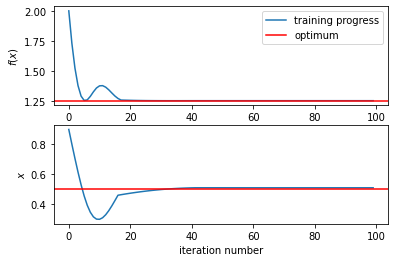

In [119]:
import matplotlib.pyplot as plt
figure, axs = plt.subplots(2)
axs[0].plot(f_x_vals, label='training progress')
axs[0].axhline(1.25, color='red', label='optimum')
axs[0].set_ylabel('$f(x)$')
axs[0].legend()
axs[1].plot(x_vals)
axs[1].axhline(0.5, color='red')
axs[1].set_ylabel('$x$')
axs[1].set_xlabel('iteration number')
plt.show()

## Using learning rate decay

In [114]:
import torch

x = torch.autograd.Variable(torch.Tensor([1]), requires_grad=True)

n_iterations = 100
learning_rate = .1
optimizer = torch.optim.Adam(params=[x], lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=10, factor=0.1)

def f(x):
    return 3*x**2 - 3*x + 2

f_x_vals = []
x_vals = []
for interation_number in range(n_iterations):
    optimizer.zero_grad()
    cost = f(x)
    cost.backward()
    optimizer.step()
    scheduler.step(cost)
    f_x_vals.append(cost.detach().numpy()[0])
    x_vals.append(x.detach().numpy()[0])
print(f'last x: {x_vals[-1]}, last f(x): {f_x_vals[-1]}')

last x: 0.5075238943099976, last f(x): 1.2501697540283203


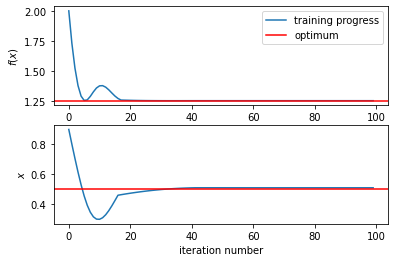

In [120]:
import matplotlib.pyplot as plt
figure, axs = plt.subplots(2)
axs[0].plot(f_x_vals, label='training progress')
axs[0].axhline(1.25, color='red', label='optimum')
axs[0].set_ylabel('$f(x)$')
axs[0].legend()
axs[1].plot(x_vals)
axs[1].axhline(0.5, color='red')
axs[1].set_ylabel('$x$')
axs[1].set_xlabel('iteration number')
plt.show()

## Check out more
There are plenty of optimizers and learning rate schedulers.
Please visit https://pytorch.org/docs/stable/optim.html for more information.

# Note

This part was generic introduction to optimization. From now on the notation is different from the one above.

Here we optimize the parameter $x$. However in the next sections $x$ will be used to denote some fixed data e.g. an image. The parameters to optimze will be weights and biases of a network and commonly abbreviated by $w$ and $b$.